In [43]:
import os
print (os.environ['CONDA_DEFAULT_ENV'])

import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

base
/Users/vbloise/.pyenv/versions/3.9.1/bin/python
3.9.1 (default, Feb 11 2021, 22:02:36) 
[Clang 12.0.0 (clang-1200.0.32.29)]
sys.version_info(major=3, minor=9, micro=1, releaselevel='final', serial=0)


In [44]:
!pip list

Package              Version
-------------------- -----------
appnope              0.1.3
argon2-cffi          21.3.0
argon2-cffi-bindings 21.2.0
asttokens            2.0.5
attrs                21.4.0
autopep8             1.6.0
backcall             0.2.0
beautifulsoup4       4.11.1
bleach               5.0.0
cffi                 1.15.0
cycler               0.11.0
debugpy              1.6.0
decorator            5.1.1
defusedxml           0.7.1
entrypoints          0.4
executing            0.8.3
fastjsonschema       2.15.3
fonttools            4.33.3
ipykernel            6.15.0
ipython              8.4.0
ipython-genutils     0.2.0
ipywidgets           7.7.0
jedi                 0.18.1
Jinja2               3.1.2
jsonschema           4.6.0
jupyter              1.0.0
jupyter-client       7.3.4
jupyter-console      6.4.3
jupyter-core         4.10.0
jupyterlab-pygments  0.2.2
jupyterlab-widgets   1.1.0
kiwisolver           1.4.3
MarkupSafe           2.1.1
matplotlib           3.5.2
matplotlib-

In [77]:
from tsplib import readerTSP, plotterTSP
import networkx as nx

reader = readerTSP.ReaderTSP()
plotter = plotterTSP.PlotterTSP(None)

iterator = iter(reader.instances_generator())
next(iterator); next(iterator); next(iterator)
instance = next(iterator)
n_points, positions, distance_matrix, name, optimal_tour = instance
print(name)

ch130


In [158]:
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree
import numpy as np

def add_optimal_edges(g, opt_tour):
    prev = None
    first = None
    edges = []
    for node in opt_tour:
        if prev is None:
            first = prev = node
            continue
        edge_tpl = (prev, node)
        g.add_edge(*edge_tpl)
        edges.append(edge_tpl)
        prev = node
    g.add_edge(first, prev)
    edges.append((first, prev))
    return edges

def add_minimum_spanning_tree(g, dist_matrix):
    X = np.triu(dist_matrix,0)
    Tcsr = minimum_spanning_tree(csr_matrix(X))

    G_mst = g.copy()
    edges = []
    for edge in np.argwhere(Tcsr>0):
        edge_tpl = (edge[0], edge[1])
        G_mst.add_edge(*edge_tpl)
        edges.append(edge_tpl)

    options['edge_color']='lightgray'
    nx.draw(G_mst, pos, **options)
    return edges

def add_shortest_edges(g, dist_matrix):
    size = distance_matrix.shape[0]

    G_min = g.copy()
    for edge in np.argsort(dist_matrix, axis=None)[size:size*3]:
        #print(edge, edge % size, edge // size)
        G_min.add_edge(edge % size, edge // size)

    options['edge_color']='red'
    nx.draw(G_min, pos, **options)
    
def add_local_shortest_edges(g, dist_matrix):
    j = 0
    G_min2 = g.copy()
    edges = []
    for i in np.argsort(dist_matrix, axis=1):
        edge_tpl = (j, i[1])
        G_min2.add_edge(*edge_tpl)
        edges.append(edge_tpl)
        
        #G_min2.add_edge(j, i[2])
        j += 1
        
    options['edge_color']='red'
    nx.draw(G_min2, pos, **options)
    return edges

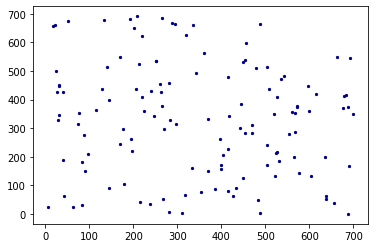

In [82]:
plotter.set_figure(1)
plotter.plot_points(positions)

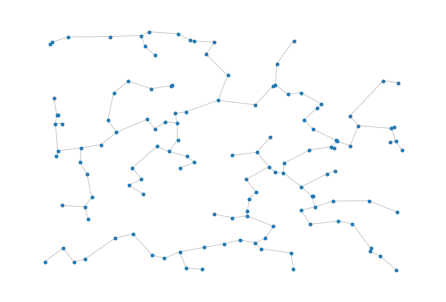

In [96]:
edges_mst = add_minimum_spanning_tree(G, distance_matrix)

#filterX = X[X > 0]

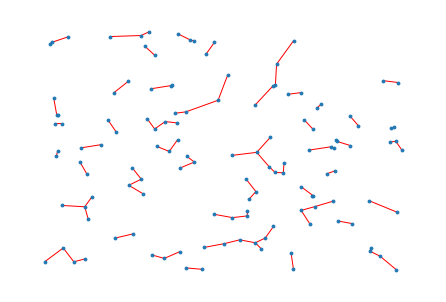

In [97]:
edges_lmin = add_local_shortest_edges(G, distance_matrix)

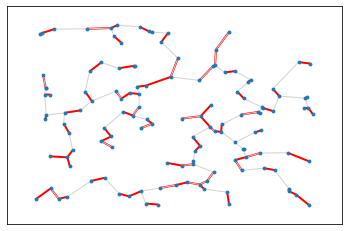

In [179]:
#print(edges_mst)
#print(edges_lmin)
#np.intersect1d(edges_mst, edges_lmin)

rev_edges_lmin = [(e[1], e[0]) for e in edges_lmin]
intersect_edges = set(edges_mst).intersection(set(edges_lmin).union(rev_edges_lmin))
diff_edges = set(edges_mst) - set(edges_lmin)
#print(len(intersect_edges))
#print(len((diff_edges).union(set(edges_lmin) - set(edges_mst))))
#add_shortest_edges(G, distance_matrix)

G_nsct = G.copy()
options = {'node_size':8}
nx.draw_networkx_nodes(G_nsct, pos, node_size=8)
for edge in intersect_edges:
    G_nsct.add_edge(edge[0], edge[1], color='red')
nx.draw_networkx_edges(G_nsct, pos, edgelist=intersect_edges, edge_color='red', width=2)
    
for edge in diff_edges:
    G_nsct.add_edge(edge[0], edge[1], color='gray')
nx.draw_networkx_edges(G_nsct, pos, edgelist=diff_edges, edge_color='lightgray')



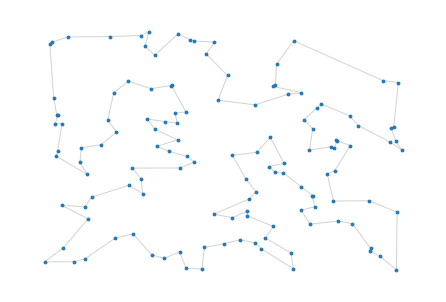

In [159]:
G_opt = G.copy()
opt_edges = add_optimal_edges(G_opt, optimal_tour)
options['edge_color']='lightgray'
nx.draw(G_opt, pos, **options)


In [180]:
rev_opt_edges = [(e[1], e[0]) for e in opt_edges]
error_edges = set(intersect_edges) - set(opt_edges) - set(rev_opt_edges)
print(len(opt_edges), len(intersect_edges), len(error_edges))


130 85 15


In [168]:
print(set(error_edges))
print('\n', set(opt_edges))

{(34, 117), (41, 43), (25, 96), (1, 49), (52, 119), (103, 106), (51, 74), (80, 86), (3, 34), (5, 101), (49, 129), (75, 108), (19, 45), (6, 96), (37, 78), (45, 79), (9, 13), (22, 46), (85, 87), (65, 84), (35, 83), (23, 115), (110, 122), (66, 95), (16, 30), (55, 64), (4, 10), (2, 113), (14, 23), (84, 124), (63, 68), (61, 104)}

 {(60, 108), (115, 23), (26, 30), (42, 103), (27, 114), (47, 62), (82, 29), (107, 113), (18, 26), (102, 80), (108, 75), (61, 27), (73, 74), (34, 3), (88, 93), (53, 34), (125, 20), (109, 88), (51, 64), (28, 14), (75, 10), (114, 111), (64, 55), (116, 38), (62, 67), (16, 33), (76, 102), (17, 7), (85, 68), (39, 46), (22, 39), (14, 99), (44, 15), (118, 83), (127, 104), (110, 118), (55, 8), (33, 42), (81, 100), (122, 110), (3, 19), (68, 63), (101, 5), (98, 73), (84, 65), (59, 54), (21, 36), (66, 13), (67, 97), (104, 61), (103, 126), (90, 71), (119, 52), (89, 124), (9, 101), (43, 41), (8, 56), (91, 72), (1, 53), (113, 2), (13, 9), (69, 96), (70, 40), (105, 37), (112, 24)

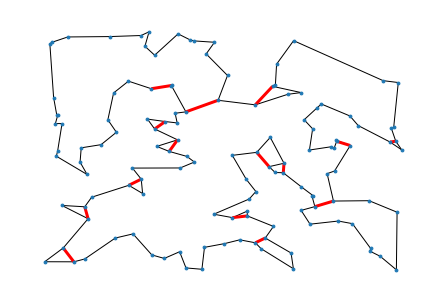

In [182]:
nx.draw(G_opt, pos, **options)
nx.draw_networkx_edges(G_opt, pos, edgelist=error_edges, edge_color='red', width=3)